In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
daupner_df = pd.read_csv('/home/anna/annaCode/UiO/MEK4350/Daupner/freak.data', names=['raw_height'], header=None)
daupner_df.head(2)

,raw_height
0,21.85
1,22.22


In [3]:
sea_level=daupner_df.raw_height.mean()
# i do not do correction for tide
daupner_df['corrected_height'] = sea_level - daupner_df.raw_height
daupner_df.head(2)

,raw_height,corrected_height
0,21.85,4.068708
1,22.22,3.698708


In [4]:
first_timestamp_str = "1995-01-01T15:00:00.000"
time_delta_us = 468800
time_delta = np.timedelta64(time_delta_us, 'us')
timestamps_array = np.empty(daupner_df.shape[0], dtype='datetime64[us]')
timestamps_array[0] = np.datetime64(first_timestamp_str)
indices = np.arange(daupner_df.shape[0] - 1)
timestamps_array[1:] = timestamps_array[0] + time_delta * (indices + 1)
daupner_df['timestamp'] = timestamps_array

daupner_df[ ::1]

,raw_height,corrected_height,timestamp
0,21.85,4.068708,1995-01-01 15:00:00.000000
1,22.22,3.698708,1995-01-01 15:00:00.468800
2,23.10,2.818708,1995-01-01 15:00:00.937600
3,23.83,2.088708,1995-01-01 15:00:01.406400
4,24.37,1.548708,1995-01-01 15:00:01.875200
...,...,...,...
2555,23.48,2.438708,1995-01-01 15:19:57.784000
2556,23.62,2.298708,1995-01-01 15:19:58.252800
2557,23.58,2.338708,1995-01-01 15:19:58.721600
2558,23.33,2.588708,1995-01-01 15:19:59.190400


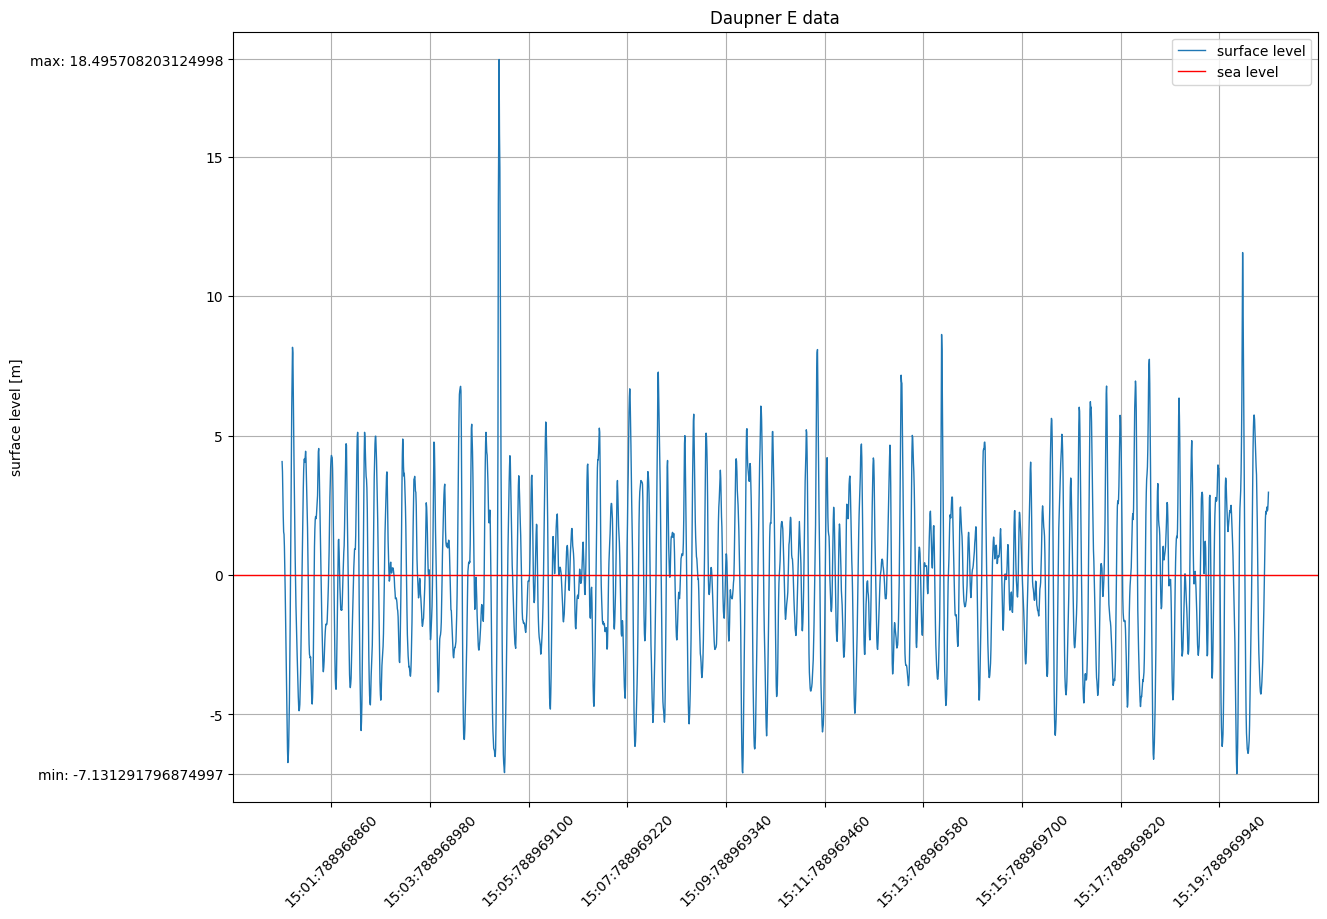

In [5]:
fig, ax = plt.subplots(figsize=(14, 10))
date_format = mdates.DateFormatter('%H:%M:%s')

id_max = daupner_df['corrected_height'].idxmax()
id_min = daupner_df['corrected_height'].idxmin()
max_sl = daupner_df.iloc[id_max].corrected_height
min_sl = daupner_df.iloc[id_min].corrected_height
timestamp_max = daupner_df.iloc[id_max].timestamp
timestamp_min = daupner_df.iloc[id_min].timestamp

plt.xticks(rotation=45)
first = daupner_df['timestamp'].iloc[0]

ax.xaxis.set_major_locator(mdates.SecondLocator(interval=120))
ax.xaxis.set_major_formatter(date_format)
#plt.xticks([first, timestamp_min, timestamp_max], [f' {first}', f'min: {timestamp_min}', f'max: {timestamp_max}'])

plt.ylim(min_sl - 1,max_sl + 1)
plt.ylabel('surface level [m]')
plt.yticks([min_sl, -5, 0, 5, 10, 15, max_sl], [f'min: {min_sl}',  '-5','0','5','10','15', f'max: {max_sl}'])

ax.plot(daupner_df.timestamp, daupner_df.corrected_height, linewidth=1, label ='surface level')
ax.axhline(y=0, color='red', linewidth=1, linestyle='-', label=f'sea level')

ax.grid()
ax.legend()

plt.title('Daupner E data')
plt.show()